In [125]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import pandas as pd
import tensorflow as tf
import math
import warnings
warnings.filterwarnings("ignore")
from scipy.io import loadmat

In [126]:
#initialisation des parametres de notre RN
def initialisation(n0, n1,n2): 
     #paramétres premiéres couches
     W1=np.random.randn(n1,n0)
     b1=np.random.randn(n1,1)
    #paramétres de la seconde couche  
     W2=np.random.randn(n2,n1)
     b2=np.random.randn(n2,1)
     
     parametres= {
          'W1': W1,
          'W2': W2,
          'b1': b1,
          'b2': b2 
     }

     return parametres 

In [127]:
def y_chap(na,T,u,y):

    shi=[]
    
    
    for t in range(1,T):
        for i in range(1,na):

            shi = np.append(shi,-y[t-i])
            shi = np.append(shi,u[t-i])
        
             
    #parametres = initialisation([na + nb,32,1])
    print(shi.shape)
    theta = np.random.normal(size=4802)

    y_chap = theta.dot(shi) + np.random.normal(size=4802)

    return y_chap

In [128]:
data_at7 = loadmat('Données/data_at7.mat') 

temps=data_at7['temps']; T=data_at7['T'].T[:,0]; coef_puis=data_at7['coef_puis'].T[:,0]

# T=pd.DataFrame(T).T
# temps=pd.DataFrame(temps).T
# coef_puis=pd.DataFrame(coef_puis).T

    
dfT = pd.DataFrame(T,columns = ['T']) 
dfCoef_puis = pd.DataFrame(coef_puis,columns = ['coef_puis']) 

data=pd.concat([dfT,dfCoef_puis], axis=1)
y=data['T']
y=y.to_numpy()
y=y.reshape((y.shape[0],1))[0:50,:]
X=data['coef_puis']
X=X.to_numpy()
X=X.reshape((X.shape[0],1))[0:50,:]

In [129]:
na =50
nb = 25
T = 50

y_chap(na,T,X,y)

(4802,)


array([-645.4809103 , -642.55661586, -644.76270076, ..., -643.66948812,
       -645.48091234, -644.66411125])

In [130]:
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer="adam")

In [131]:
# Training
model.fit( X, y, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 454.2628
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 452.4362
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 450.5817
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 448.7556
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 447.0032
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 445.2481
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 443.5194
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 441.7609
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 439.9736
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 438.1160
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - loss: 436.1601
Epoch 12/100
2/2 [==============================] - 0s 2ms/step - loss: 434.0972
Epoch 13/100
2/2 [===================

2/2 [==============================] - 0s 3ms/step


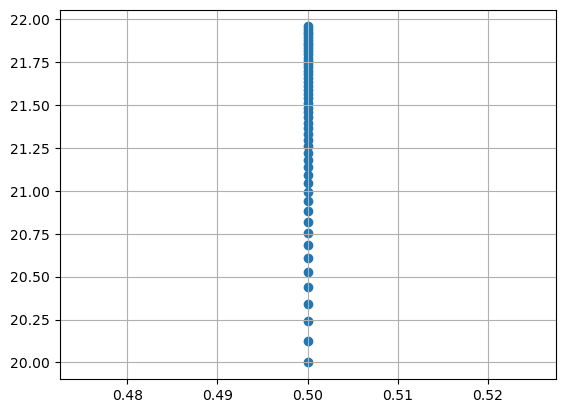

In [132]:
# Compute the output 
y_predicted = model.predict(X)

# Display the result
plt.scatter(X[::1], y[::1])
plt.plot(X, y_predicted, 'r', linewidth=2)
plt.grid()
plt.show()